<div style="text-align:center;font-size:48px; font-weight:800; margin:0;"><b><center> Customer Churn Prediction</b></center></div>

----
#### &nbsp;**Name:** SAKSHI BADOLA &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **ERP ID:** 0251MTCS05 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Course:** M.Tech
----
## **Problem Statement**

Customer churn occurs when customers stop using a company’s services. Since retaining customers is more cost-effective than acquiring new ones, predicting churn in advance is essential for business growth.

This project aims to build a Machine Learning model that predicts whether a customer is likely to churn using historical data. The dataset includes customer demographics, service usage patterns, account details and a churn label. The model will learn patterns associated with churn and help identify customers at high risk.

### **Objectives**
- Preprocess and clean the dataset  
- Perform exploratory data analysis (EDA)  
- Train and evaluate multiple ML models  
- Compare models using Accuracy, Precision, Recall, F1-Score and ROC-AUC  
- Select the best-performing model for churn prediction
   
#### **Dataset:** <b>[Telco-Customer-Churn.csv](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv) </b>

| **Feature** | customerID | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies | Contract | PaperlessBilling | PaymentMethod | MonthlyCharges | TotalCharges | Churn |
|-------------|------------|--------|----------------|---------|-------------|--------|--------------|----------------|------------------|----------------|--------------|------------------|--------------|--------------|------------------|----------|-------------------|----------------|----------------|--------------|--------|
| **Description** | Unique customer identifier | Male/Female | Senior citizen (0/1) | Has partner (Yes/No) | Has dependents (Yes/No) | Tenure in months | Has phone service | Multiple lines availability | Type of internet service | Online security available | Online backup available | Device protection add-on | Tech support add-on | Streaming TV | Streaming Movies | Contract type | Paperless billing (Yes/No) | Payment method | Monthly bill amount | Total amount paid | Customer churn status (Yes/No) |

  
### **Outcome**
A reliable churn prediction model will help reduce customer loss, improve retention strategies and support better business decisions.


### ***1. Import Libraries:***

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Numerical computing library, especially for arrays

# Scikit-learn (sklearn) is a machine learning library
from sklearn.model_selection import (  # Function to split data into training and testing sets
    train_test_split,
)
from sklearn.preprocessing import (  # Used to encode categorical labels into numerical labels
    LabelEncoder,
)
from sklearn.metrics import (
    accuracy_score,  # Metric for classification accuracy
    precision_score,  # Metric for precision of positive predictions
    recall_score,  # Metric for recall (sensitivity) of positive predictions
    f1_score,  # Harmonic mean of precision and recall
    roc_auc_score,  # Area under the Receiver Operating Characteristic curve
    confusion_matrix,  # Table summarizing classification performance
)
from sklearn.ensemble import (  # Ensemble learning method for classification
    RandomForestClassifier,
)

import xgboost as xgb  # Extreme Gradient Boosting library for high-performance machine learning
import matplotlib.pyplot as plt  # Library for creating static, interactive, and animated visualizations
import seaborn as sns  # Statistical data visualization library built on Matplotlib

### **2. Load Dataset**

In [2]:
# Load the Telco Customer Churn dataset from a public URL into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **3. Basic Cleaning and Preprocessing**

In [7]:
# Convert 'TotalCharges' column to numeric format. Errors encountered during conversion
# (e.g., non-numeric strings) will be coerced to NaN (Not a Number).

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

#------------------------------------------------------------------------------

# Fill any NaN values in the 'TotalCharges' column with the median value of that column.
# This handles missing values introduced by the conversion or originally present.
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

#------------------------------------------------------------------------------

# Drop the 'customerID' column. This column is a unique identifier and not useful for
# predicting churn, as it does not contain predictive information.
df = df.drop("customerID", axis=1)
#------------------------------------------------------------------------------

### **4. Encode Categorical Variables**

In [8]:
# ----------------------------------------------------------------------------------
# This section prepares categorical features for machine learning models.
# Binary categorical features are encoded using LabelEncoder, while others use One-Hot Encoding.

# Identify columns that have exactly two unique values (binary features).
# These are suitable for Label Encoding (e.g., Yes/No, Male/Female).
binary_cols = [col for col in df.columns if df[col].nunique() == 2]


# ----------------------------------------------------------------------------------

# Initialize LabelEncoder.
le = LabelEncoder()
# Apply Label Encoding to each binary column. This converts string labels to 0s and 1s.
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# ----------------------------------------------------------------------------------

# Apply One-Hot Encoding to the remaining categorical variables.
# pd.get_dummies converts categorical columns into new binary (0 or 1) columns.
# `drop_first=True` removes the first category column for each original feature
# to avoid multicollinearity (the dummy variable trap).
df = pd.get_dummies(df, drop_first=True)

### **5. Train / Test Split**

In [9]:
# ------------------------------------------------------------------------------------------
# Separate the features (input variables) from the target variable (what we want to predict).
X = df.drop("Churn", axis=1)  # X contains all features except the 'Churn' column.
y = df["Churn"]  # y contains only the 'Churn' column, which is our target.

# ------------------------------------------------------------------------------------------

# Split the dataset into training and testing sets.
# `test_size=0.2` allocates 20% of the data for testing, 80% for training.
# `random_state=42` ensures that the split is reproducible every time the code is run.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

### **6. Algoritms**

In [10]:
# Define a function to calculate and print various evaluation metrics for a given model.
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")  # Prints the name of the model being evaluated.
    print("Accuracy:", accuracy_score(y_true, y_pred))  # Calculates overall prediction accuracy.
    print("Precision:", precision_score(y_true, y_pred))  # Calculates precision for the positive class.
    print("Recall:", recall_score(y_true, y_pred))  # Calculates recall for the positive class.
    print("F1 Score:", f1_score(y_true, y_pred))  # Calculates F1 score, a balance of precision and recall.
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))  # Calculates Area Under the Receiver Operating Characteristic Curve.
    print("\nConfusion Matrix:")  # Prints a label for the confusion matrix.
    print(confusion_matrix(y_true, y_pred))  # Prints the confusion matrix (True Positives, False Positives, etc.).

###      &emsp;&emsp; **1. Logistic Regression Model**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

# 🔹 Predict
y_pred_log = log_model.predict(X_test_scaled)

# 🔹 Probabilities for ROC-AUC 
log_prob = log_model.predict_proba(X_test_scaled)[:,1]

In [12]:
evaluate_model("Logistic Regression", y_test, y_pred_log, log_prob)


===== Logistic Regression =====
Accuracy: 0.8197303051809794
Precision: 0.683076923076923
Recall: 0.5951742627345844
F1 Score: 0.6361031518624641
ROC-AUC: 0.8620040473257631

Confusion Matrix:
[[933 103]
 [151 222]]


###      &emsp;&emsp; **2. Random Forest Model**

In [13]:
# Initialize the RandomForestClassifier.
# `n_estimators=300` specifies the number of trees in the forest.
# `random_state=42` ensures reproducibility of the model results.
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# --------------------------------------------------------------------------------

# Train the Random Forest model using the training data.
rf.fit(X_train, y_train)

# --------------------------------------------------------------------------------

# Make predictions on the test set. These are the predicted class labels (0 or 1).
rf_pred = rf.predict(X_test)

# --------------------------------------------------------------------------------

# Get probability estimates for the positive class (churn=1).
# `[:, 1]` selects the probabilities for the positive class.
rf_prob = rf.predict_proba(X_test)[:, 1]

#----------------------------------------------------------------------------------

In [14]:
evaluate_model("Random Forest", y_test, rf_pred, rf_prob)


===== Random Forest =====
Accuracy: 0.7970191625266146
Precision: 0.6641509433962264
Recall: 0.4718498659517426
F1 Score: 0.5517241379310345
ROC-AUC: 0.8412951442442058

Confusion Matrix:
[[947  89]
 [197 176]]


###      &emsp;&emsp; **3. XGBOOST Model**

In [15]:
# Initialize and train the XGBoost Classifier.
# `eval_metric='logloss'` is a common best practice for classification with XGBoost.
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the XGBoost model using the training data.
xgb_model.fit(X_train, y_train)

# Make predictions on the test set. These are the predicted class labels (0 or 1).
xgb_pred = xgb_model.predict(X_test)

# Get probability estimates for the positive class (churn=1).
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [16]:
evaluate_model("XGBoost", y_test, xgb_pred, xgb_prob)


===== XGBoost =====
Accuracy: 0.7892122072391767
Precision: 0.6283783783783784
Recall: 0.49865951742627346
F1 Score: 0.5560538116591929
ROC-AUC: 0.8391770265094662

Confusion Matrix:
[[926 110]
 [187 186]]


### **Feature importance plot**

<Figure size 300x200 with 0 Axes>

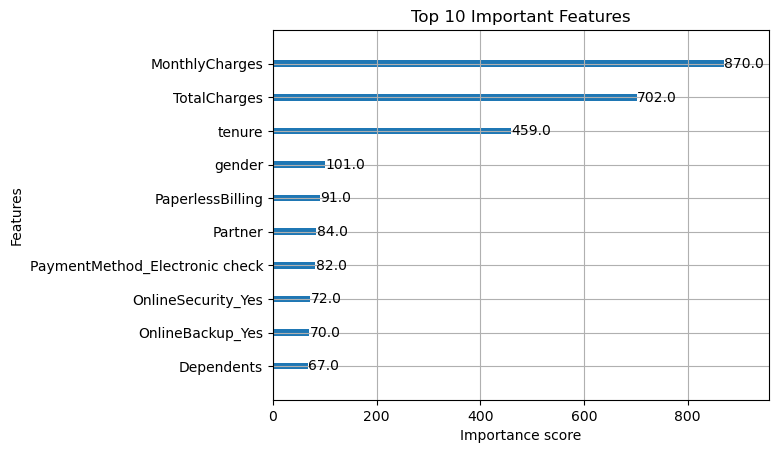

In [17]:
# Create a figure to display the feature importance plot.

plt.figure(figsize=(3, 2))

# Plot the top 10 most important features from the XGBoost model.
# Feature importance indicates how much each feature contributed to the model's predictions.

xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features")  # Set the title of the plot.
plt.show()  # Display the generated plot.


In [18]:
# Logistic Regression
acc_log  = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log  = recall_score(y_test, y_pred_log)
f1_log   = f1_score(y_test, y_pred_log)
auc_log  = roc_auc_score(y_test, log_prob)

# Random Forest
acc_rf  = accuracy_score(y_test, rf_pred)
prec_rf = precision_score(y_test, rf_pred)
rec_rf  = recall_score(y_test, rf_pred)
f1_rf   = f1_score(y_test, rf_pred)
auc_rf  = roc_auc_score(y_test, rf_prob)

# XGBoost
acc_xgb  = accuracy_score(y_test, xgb_pred)
prec_xgb = precision_score(y_test, xgb_pred)
rec_xgb  = recall_score(y_test, xgb_pred)
f1_xgb   = f1_score(y_test, xgb_pred)
auc_xgb  = roc_auc_score(y_test, xgb_prob)

results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy":  [acc_log,  acc_rf,  acc_xgb],
    "Precision": [prec_log, prec_rf, prec_xgb],
    "Recall":    [rec_log,  rec_rf,  rec_xgb],
    "F1-Score":  [f1_log,   f1_rf,   f1_xgb],
    "ROC-AUC":   [auc_log,  auc_rf,  auc_xgb]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# Convert metrics to % with 2 decimals using .map
for col in ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]:
    comparison_df[col] = comparison_df[col].map(lambda x: f"{x*100:.2f}%")

# Display comparison table
comparison_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,81.97%,68.31%,59.52%,63.61%,86.20%
1,Random Forest,79.70%,66.42%,47.18%,55.17%,84.13%
2,XGBoost,78.92%,62.84%,49.87%,55.61%,83.92%


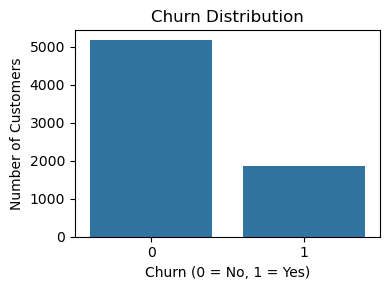

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()